In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn. model_selection import train_test_split,GridSearchCV,KFold,cross_val_predict,RandomizedSearchCV

# plottting lib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing dataset
from data import get_wine_dataset

In [4]:
data = get_wine_dataset()
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [5]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
from data_analytics import dataset_analytics
corelation = dataset_analytics(data)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

<AxesSubplot:>

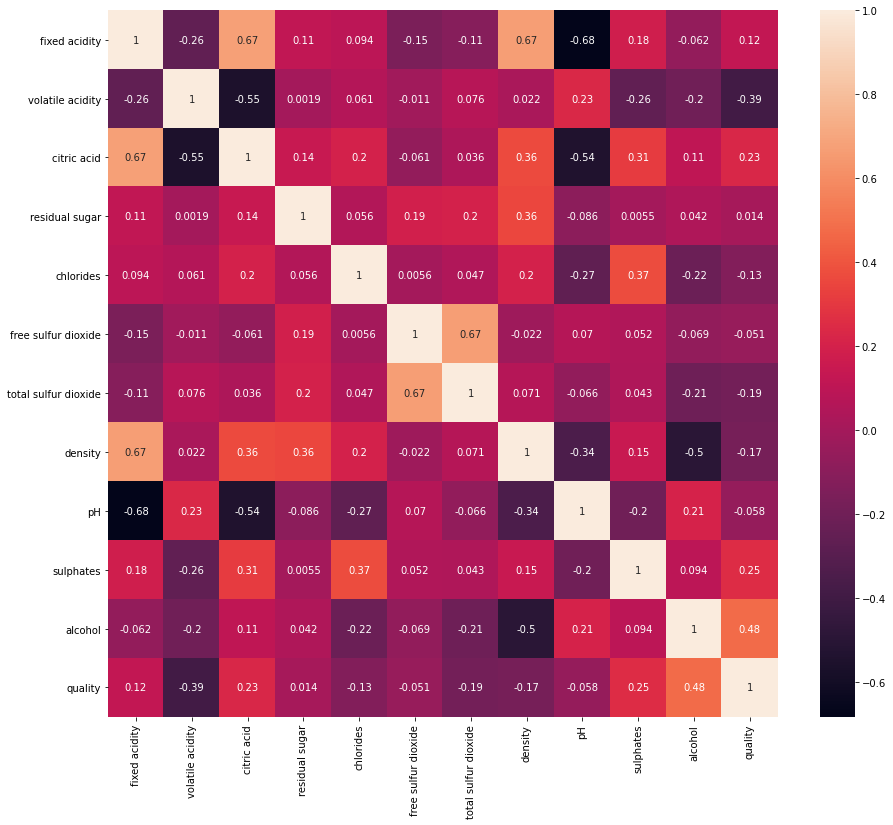

In [7]:
plt.figure(figsize=(15, 13))
sns.heatmap(corelation, annot=True)

In [8]:
corelation['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [9]:
corelation.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
selected_features=['volatile acidity', 'chlorides', 'citric acid','sulphates', 'alcohol','quality']

Text(0.5, 1.0, 'Scatter Matrix plot of selected features.')

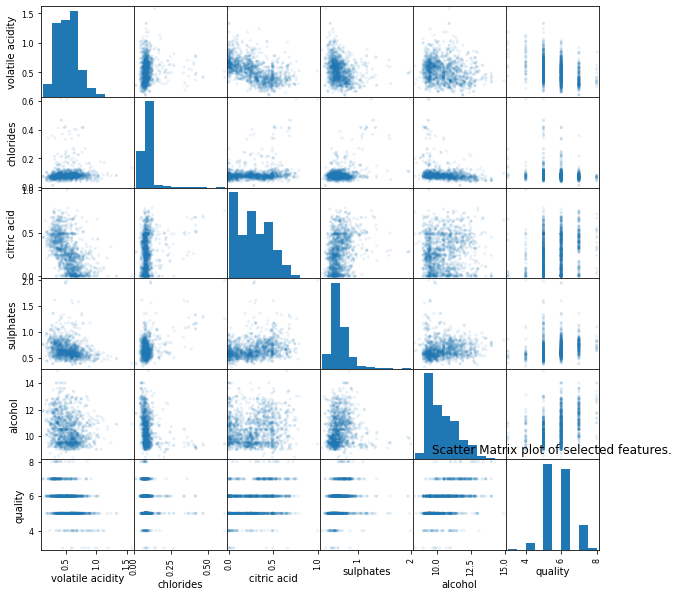

In [11]:
feat_data=data[selected_features]
pd.plotting.scatter_matrix(feat_data,alpha=0.1,figsize=(10,10))
plt.title('Scatter Matrix plot of selected features.')

<AxesSubplot:>

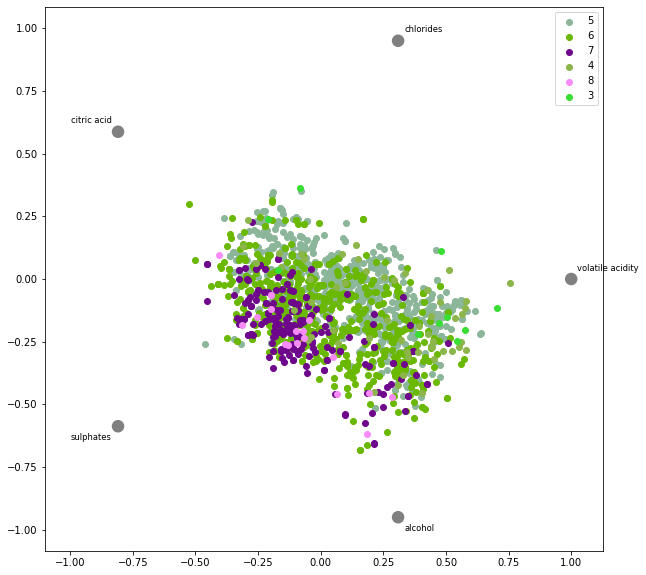

In [12]:
plt.figure(figsize=(10,10))
pd.plotting.radviz(feat_data,'quality')

In [13]:
labels=feat_data.pop('quality')
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [14]:
from models import Models
classifiers = Models(X_train, y_train, X_test, y_test)

[MLENS] backend: threading


In [15]:
#SVM Classifier
classifiers.SVM_Classifier()

SVM accuracy is :0.5375


In [16]:
#RF Classifier
classifiers.RF_Classifier(estimators = 20)

random forest accuracy is :0.984375


In [17]:
#Linear Regression Classifier
classifiers.LR_Classifier()

LogisticRegression accuracy is :0.896875


In [18]:
#Decision Tree Classifier
classifiers.DT_Classifier()

DecisionTreeClassifier accuracy is :1.0


In [19]:
#K-Nearest Neighbour Classifier
classifiers.KNN_Classifier()

KNeighborsClassifier accuracy is :0.58125


In [20]:
#Ada Boost Classifier
classifiers.AdaBoost_Classifier()

AdaBoostClassifier accuracy is :0.8375


In [21]:
#Bagging Classifier
classifiers.Bagging_Classifier(estimators=20)

BaggingClassifier accuracy is :1.0


In [22]:
#Extra Trees Classifiers
classifiers.ExtraTress_Classifier(estimators=20)

ExtraTreesClassifier accuracy is :0.99375


In [23]:
#Extreme Gradient Boosting Classifier
classifiers.XtremeGB_Classifier()

XGBClassifier accuracy is :1.0


In [24]:
from sklearn.ensemble import RandomForestClassifier
#This combines all the models above and choose features accordingly that leads to best possible result there is

combined_result = classifiers.mlen_combined_model(RandomForestClassifier(n_estimators=300))

                                      score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier      0       0.84     0.00  0.42  0.00  0.03  0.00
layer-1  baggingclassifier       0       1.00     0.00  0.08  0.00  0.02  0.00
layer-1  decisiontreeclassifier  0       1.00     0.00  0.00  0.00  0.00  0.00
layer-1  extratreesclassifier    0       0.98     0.00  0.05  0.00  0.02  0.00
layer-1  gaussiannb              0       1.00     0.00  0.01  0.00  0.00  0.00
layer-1  kneighborsclassifier    0       0.54     0.00  0.00  0.00  0.10  0.00
layer-1  logisticregression      0       0.85     0.00  0.03  0.00  0.00  0.00
layer-1  randomforestclassifier  0       0.97     0.00  0.08  0.00  0.02  0.00
layer-1  svc                     0       0.50     0.00  0.19  0.00  0.02  0.00
layer-1  xgbclassifier           0       1.00     0.00  0.54  0.00  0.01  0.00
layer-2  adaboostclassifier      0       0.84     0.01  0.25  0.00  0.06  0.00
layer-2  baggingclassifier       0       1.00     0.

In [25]:
#Presents the report for the mlens classifier
classifiers.final_report(combined_result)

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00       130
           6       1.00      1.00      1.00       132
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00         5

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

